In [64]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib notebook

ncaa = pd.read_csv('NCAA Top Players.csv',skiprows=1)
ncaa2018 = ncaa[ncaa['active_from']==2018]
num_ncaa = len(ncaa2018)
new_index = pd.Series(np.arange(num_ncaa))
ncaa2018.index = new_index
ncaa2018 = ncaa2018.copy()
num = 0
for i in ncaa2018['height']:
    ncaa2018.loc[num,'height'] = (int(i[0])*12 + int(i[2:]))*2.54
    num += 1
ncaa2018_G = ncaa2018[ncaa2018['position'].str.contains('G')]
ncaa2018_F = ncaa2018[ncaa2018['position'].str.contains('F')]
ncaa2018_C = ncaa2018[ncaa2018['position'].str.contains('C')]

ncaa2018_G_height = ncaa2018_G['height'].mean()
ncaa2018_F_height = ncaa2018_F['height'].mean()
ncaa2018_C_height = ncaa2018_C['height'].mean()

ncaa2018_G_weight = ncaa2018_G['weight'].mean()
ncaa2018_F_weight = ncaa2018_F['weight'].mean()
ncaa2018_C_weight = ncaa2018_C['weight'].mean()

nba = pd.read_excel('NBA Top Players.xlsx')
nba = nba.drop_duplicates(subset=['Player'],keep='first')
num_nbaplayers = len(nba)
new_index_1 = pd.Series(np.arange(num_nbaplayers))
nba.index = new_index_1
nba = nba.copy()
num_nba = 0
for i in nba['HT']:
    if type(i) == str:
        nba.loc[num_nba,'HT'] = (int(i.split('-')[0])*12 + int(i.split('-')[1]))*2.54
    else:
        nba.loc[num_nba,'HT'] = (int(nba['HT'][num_nba].month)*12 + int(nba['HT'][num_nba].day))*2.54
    num_nba += 1
nba_G = nba[nba['Pos'].str.contains('G')]
nba_F = nba[nba['Pos'].str.contains('F')]
nba_C = nba[nba['Pos'].str.contains('C')]

nba_G_height = nba_G['HT'].mean()
nba_F_height = nba_F['HT'].mean()
nba_C_height = nba_C['HT'].mean()

nba_G_weight = nba_G['WT'].mean()
nba_F_weight = nba_F['WT'].mean()
nba_C_weight = nba_C['WT'].mean()

df = pd.DataFrame([[ncaa2018_G_height,ncaa2018_G_weight,nba_G_height,nba_G_weight],
                   [ncaa2018_F_height,ncaa2018_F_weight,nba_F_height,nba_F_weight],
                  [ncaa2018_C_height,ncaa2018_C_weight,nba_C_height,nba_C_weight]],
                 columns = pd.MultiIndex.from_product([['NCAA','NBA'],['height','weight']]),
                 index = ['Guard','Forward','Center'])
df

NCAA                     NBA            
             height      weight      height      weight
Guard    194.564000  198.307692  193.446400  202.120000
Forward  204.759649  223.280702  205.166452  236.983871
Center   210.094286  234.857143  211.981143  256.228571

<IPython.core.display.Javascript object>


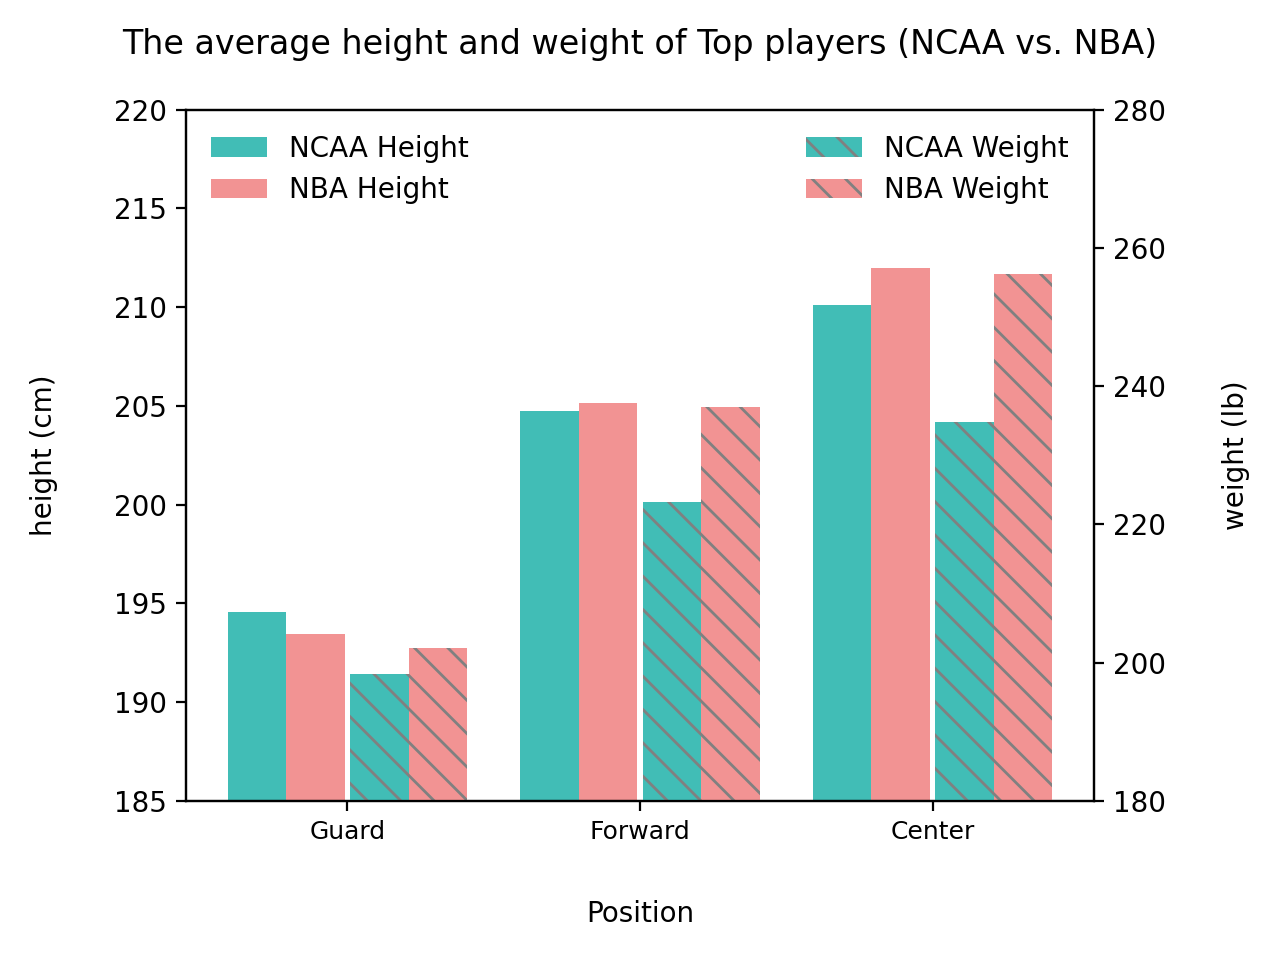

In [134]:
fig, ax1 = plt.subplots()
#labels = ['Guard', 'Forward', 'Center']
ncaa_height = df['NCAA','height']
nba_height = df['NBA','height']
ncaa_weight = df['NCAA','weight']
nba_weight = df['NBA','weight']

plt.rcParams['axes.labelsize'] = 10  # xy轴label的size
plt.rcParams['xtick.labelsize'] = 9  # x轴ticks的size
plt.rcParams['ytick.labelsize'] = 10  # y轴ticks的size
plt.rcParams['legend.fontsize'] = 10  # 图例的size
plt.rcParams["hatch.color"] = 'grey'
plt.rcParams['axes.labelpad'] = 20

width = 0.2  # 柱形的宽度
x1_list = []
x2_list = []
x3_list = []
x4_list = []
for i in range(len(ncaa_height)):
    x1_list.append(i)
    x2_list.append(i + width)
    x3_list.append(i + 2 * width + 0.02)
    x4_list.append(i + 3 * width + 0.02)

# 设置左侧Y轴对应的figure
ax1.set_ylabel('height (cm)')
ax1.set_ylim(185, 220)
ax1.bar(x1_list, ncaa_height, width=width, color='lightseagreen', alpha=0.85, align='edge', label = 'NCAA Height' )
ax1.bar(x2_list, nba_height, width=width, color='lightcoral', alpha=0.85, align='edge', label = 'NBA Height')



# 设置右侧Y轴对应的figure
ax2 = ax1.twinx()
ax2.set_ylabel('weight (lb)')
ax2.set_ylim(180,280)
ax2.bar(x3_list, ncaa_weight, width=width, color='lightseagreen', alpha=0.85, align='edge', hatch=r'\\', label = 'NCAA Weight')
ax2.bar(x4_list, nba_weight, width=width, color='lightcoral', alpha=0.85, align='edge', hatch=r'\\', label = 'NBA Weight')

xticks_list = []
for q in x3_list:
    xticks_list.append(q-0.01)

ax1.set_xticks(xticks_list)
ax1.set_xticklabels(['Guard', 'Forward', 'Center'])
#ax1.set_xticklabels(ax1.get_xticklabels())  # 设置共用的x轴
ax1.set_xlabel('Position')
ax1.legend(loc = 2, frameon=False)
ax2.legend(loc = 1, frameon=False)
ax1.set_title('The average height and weight of Top players (NCAA vs. NBA)', pad = 20)

plt.tight_layout()
plt.savefig("ncaa v nba.png")
plt.show()

In [111]:
np.linspace(-1,2,5)

array([-1.  , -0.25,  0.5 ,  1.25,  2.  ])

In [113]:
np.array(-1,2.3)

TypeError: Cannot interpret '2.3' as a data type